# 背景介绍
本次比赛要求选手基于大语言模型LLM构建一个问答系统，问答内容涉及基金/股票/债券/招股书等不同数据来源。不限制选手的模型使用，选手可以选择商业化模型或者开源模型，可以结合多个模型，可以采用公开访问的外部数据进行微调模型，也可以采用LangChain、向量数据库等相关技术。

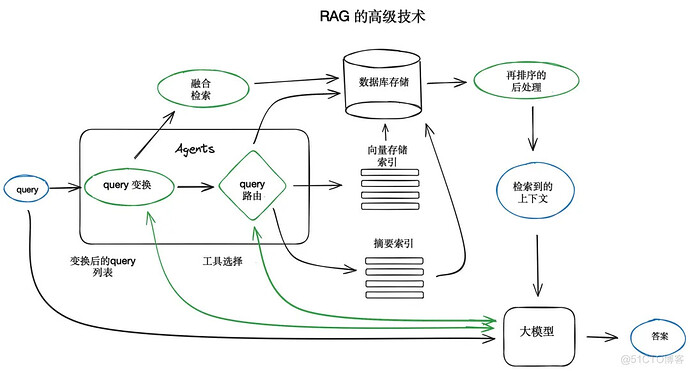

为参赛选手提供比赛涉及的全部结构化数据和文本数据，包括10张基金表数据和80篇招股书文档，比赛所有问题的答案均可在数据中查询得到。

> SQLite数据库.db

```text
大小：1.46g
文件格式：sqllite db文件
文件数量：1
时间跨度：2019年-2021年
数据表说明：
◦ 基金基本信息
◦ 基金股票持仓明细
◦ 基金债券持仓明细
◦ 基金可转债持仓明细
◦ 基金日行情表
◦ A股票日行情表
◦ 港股票日行情表
◦ A股公司行业划分表
◦ 基金规模变动表
◦ 基金份额持有人结构
```

>招股说明书

```text
招股说明书 pdf源文件
大小：527MB
文件格式：pdf文件
文件数量：80

招股说明书 pdf解析后的txt文件
大小：44MB
文件格式：txt文件
文件数量：80
```






> 学习任务  

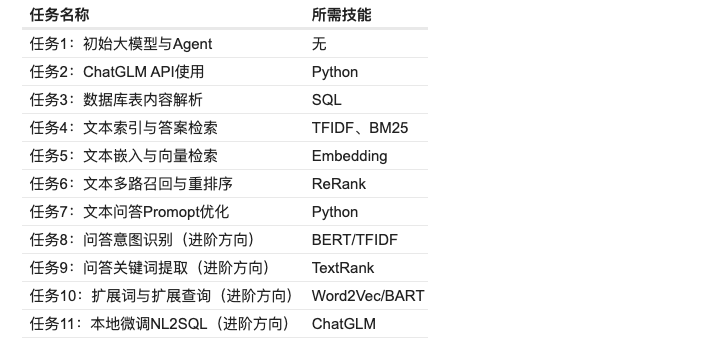  




# Task 01 初始化模型与Agent


## 大模型介绍
ChatGPT是OpenAI开发的聊天生成预训练转换器，基于GPT-3.5和GPT-4架构。该模型通过强化学习训练，具有出色的语言生成能力。ChatGPT支持文字方式的交互，用户可以使用自然语言对话的方式与ChatGPT进行通信。API的引入使得开发者能够将ChatGPT整合到自己的应用中，实现自动文本生成、自动问答等功能。

GLM是智谱AI推出的新一代基座大模型，相比上一代有着显著提升的性能，逼近GPT-4。GLM支持更长的上下文（128k），具备强大的多模态能力，并且推理速度更快，支持更高的并发。GLM的API接口为开发者提供了在自己应用中利用GLM进行语言生成的机会，为多种领域的任务提供了新的解决方案。

虽然这两个大模型都非常有效，但我们希望所有的学习者都需要学会对应的API调用。如果在本地使用ChatGLM3-6B等开源模型，也可以完成类似功能，但整体效果肯定不如这些费用的API。在任务2中，为了方便所有同学参与，我们将使用在线的ChatGPT/GLM API进行开发。这为没有本地GPU资源的同学提供了更便捷的方式。


||ChatGPT|	ChatGLM|
|---|---|---|
|官网 |	https://chat.openai.com/   |	https://open.bigmodel.cn/|
|API文档|	https://platform.openai.com/docs/api-reference  |智谱AI开放平台  |
|API计费说明	|Pricing 	|智谱AI开放平台  |


> ChatGLM对话API（支持glm-3-turbo、glm-4）

In [1]:
import time
import jwt
import requests


api_key = " "
# 实际KEY，过期时间
def generate_token(apikey: str, exp_seconds: int):
    try:
        id, secret = apikey.split(".")
    except Exception as e:
        raise Exception("invalid apikey", e)

    payload = {
        "api_key": id,
        "exp": int(round(time.time() * 1000)) + exp_seconds * 1000,
        "timestamp": int(round(time.time() * 1000)),
    }
    return jwt.encode(
        payload,
        secret,
        algorithm="HS256",
        headers={"alg": "HS256", "sign_type": "SIGN"},
    )

url = "https://open.bigmodel.cn/api/paas/v4/chat/completions"
headers = {
  'Content-Type': 'application/json',
  'Authorization': generate_token(api_key, 1000)
}

data = {
    "model": "glm-3-turbo",
    "messages": [{"role": "user", "content": """你好"""}]
}

response = requests.post(url, headers=headers, json=data)

print("Status Code", response.status_code)
print("JSON Response ", response.json())

Status Code 200
JSON Response  {'choices': [{'finish_reason': 'stop', 'index': 0, 'message': {'content': '你好👋！我是人工智能助手智谱清言（ChatGLM），很高兴见到你，欢迎问我任何问题。', 'role': 'assistant'}}], 'created': 1711940310, 'id': '8516992372239452412', 'model': 'glm-3-turbo', 'request_id': '8516992372239452412', 'usage': {'completion_tokens': 30, 'prompt_tokens': 6, 'total_tokens': 36}}


## Agent介绍
大模型的Agent指的是以大型语言模型（如GPT-3、GPT-4等）为核心，构建的具有一定自主性和智能的软件实体。这些Agent能够执行多种任务，包括但不限于自然语言处理、决策制定、任务规划和执行等。

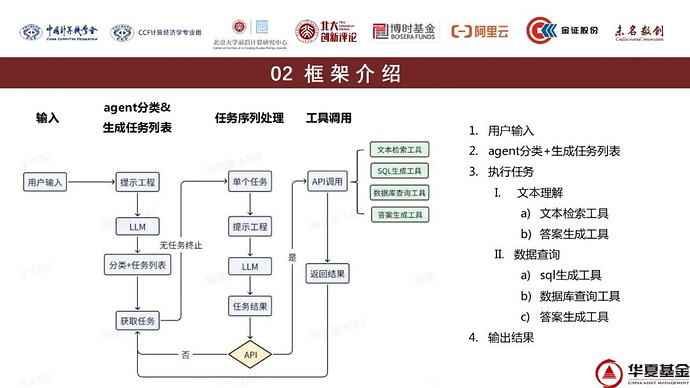  


Agent通常具备以下特点：

- 上下文学习能力：大模型的Agent能够理解和处理复杂的上下文信息，这使得它们能够在对话中保持连贯性，理解用户的需求，并在此基础上做出响应。

- 推理能力：这些Agent能够进行逻辑推理，解决复杂问题，甚至在一定程度上模拟人类的思考过程。

- 任务规划与执行：Agent能够识别任务需求，规划执行步骤，并自主执行这些任务，这在自动化工作流程和提高效率方面非常有用。

- 自然语言交互：大模型的Agent能够以自然语言与用户进行交互，提供信息、解答问题或执行命令。

- 自主智能：尽管Agent的智能程度有限，但它们在特定领域内展现出一定程度的自主性，能够自主发现问题、设定目标、构思策略并执行任务。

- 多模态能力：一些Agent还能够处理和理解多种类型的数据，如文本、图像、声音等，这使得它们在多模态任务中表现出色。

大模型的Agent在多个领域都有应用，例如智能助手、客户服务、内容创作、教育、健康咨询等。随着技术的发展，这些Agent的能力正在不断增强，它们的应用范围也在不断扩大。然而，它们仍然面临着一些挑战，如处理幻觉问题、上下文容量限制等，这些都需要持续的研究和改进。

# Task 2 ChatGLM API使用

## 话API说明
对话API是所有大模型的最常见的API，可以完成通用对话，也可以完成很多功能。但在进行调用时需要注意如下入参和参数返回结果。

- 请求参数说明
- 
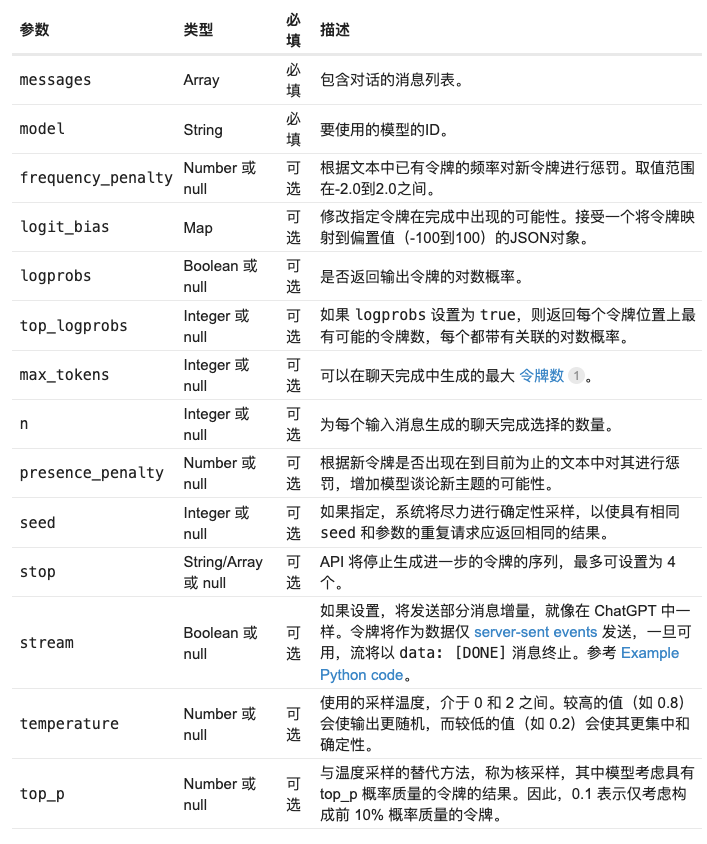

- 返回结果字段
  
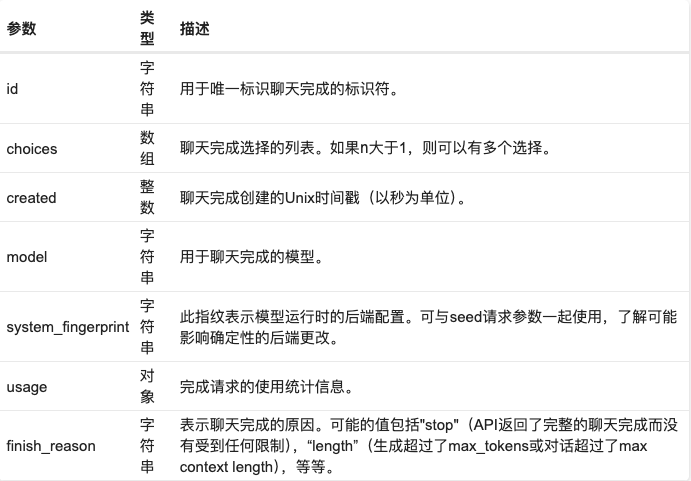     



## 正则表达式Agent
提示工程（Prompt Engineering）是指在自然语言处理（NLP）中，特别是在使用预训练语言模型（如GPT-3）时，设计和优化输入（即提示）以引导模型产生期望的输出的过程。构建Agent时可能会用到提示工程的技术，提示工程是实现Agent功能的一部分。 提示工程的关键在于如何构造问题或指令，使得模型能够理解并生成准确、相关和有用的回答或内容。

使用GLM API完成正则表达式Agent：

- 编写prompt能写一个能识别首字母大写单词的正则。
- 编写prompt让ChatGPT写一个能识别首字母大写且字符个数小于10的正则。
- 编写prompt让ChatGPT写一个能识别单词末尾为标点符号的正则。
- 通过Python代码验证正则的有效性。

In [2]:
import jwt 
import time 
import requests 


# 实际KEY，过期时间
def generate_token(apikey, exp_seconds):
    try:
        id, secret = apikey.split(".")
    except Exception as e:
        raise Exception("invalid apikey", e)

    payload = {
        "api_key": id,
        "exp": int(round(time.time() * 1000)) + exp_seconds * 1000,
        "timestamp": int(round(time.time() * 1000)),
    }
    return jwt.encode(
        payload,
        secret,
        algorithm="HS256",
        headers={"alg": "HS256", "sign_type": "SIGN"},
    )
    
def ask_glm(content):
    url = "https://open.bigmodel.cn/api/paas/v4/chat/completions"
    headers = {
      'Content-Type': 'application/json',
      'Authorization': generate_token(api_key, 1000)
    }

    data = {
        "model": "glm-3-turbo",
        "messages": [{"role": "user", "content": content}]
    }

    response = requests.post(url, headers=headers, json=data)
    return response.json()

def regex_agent(question):
    prompt_template = '''你是一个专业的python的工程师，擅长编写各种的正则表达式。将下面的要求转换为正则匹配表达式，只需要输出表达式，不要有其他的输出。
{0}
    '''.format(question)

    return ask_glm(prompt_template)['choices'][0]['message']['content']

print(regex_agent("识别首字母大写单词的正则"))       

```
\b[A-Z][a-z]*\b
```


# Task 03 数据库内容解析

数据库是存储、检索和管理数据的系统化方式。它允许用户和应用程序以结构化的形式存储大量数据，并能够高效地查询和操作这些数据。

## 1 数据模型：
- 数据模型定义了数据的结构和存储方式。常见的数据模型有关系模型（如 SQL 数据库）、文档模型（如 MongoDB）、键值存储模型（如 Redis）、图形模型（如 Neo4j）等。
## 2 数据库管理系统（DBMS）：
- DBMS 是软件，它提供了创建、管理和操作数据库所需的工具和服务。它允许用户执行各种操作，如插入、查询、更新和删除数据。流行的关系型数据库管理系统包括 MySQL、PostgreSQL、Oracle、SQL Server 和 SQLite。
## 3 数据表和字段：
在关系型数据库中，数据通常存储在表中，表由行（记录）和列（字段）组成。每个字段都有一个特定的数据类型，如整数、字符串、日期等。
## 4索引：
- 索引是数据库中的一种结构，它可以加快数据检索速度。索引类似于书籍的目录，允许数据库系统快速定位到特定的数据记录。

对数据库进行解析通常涉及以下几个步骤：

## 1连接数据库：
- 
- 使用适当的数据库连接库（如 Python 的 sqlite3、psycopg2、MySQLdb 等）来建立与数据库的连接。
- 提供必要的连接信息，如数据库地址、端口、用户名、密码等。
## 检索数据库模式：
- 使用 SQL 查询来获取数据库的模式信息，这可能包括表名、列名、数据类型、索引、外键约束等。
- 常见的查询语句可能包括 DESCRIBE table_name; 或 SHOW TABLES; 等。
## 3 分析查询结果：
- 对检索到的模式信息进行分析，以便理解数据库的结构。
- 这可能涉及到解析 SQL 查询的结果集，提取表和列的元数据。
## 4 构建数据模型：
- 根据解析出的数据库模式，构建数据模型，这可以是对象关系映射（ORM）模型，也可以是其他形式的数据结构。
- 数据模型应该能够反映出数据库中的关系和数据类型。
## 5 执行查询：
- 使用构建的数据模型来执行具体的 SQL 查询。
- 根据需要，可以执行 SELECT、INSERT、UPDATE 或 DELETE 等操作。
## 6 处理查询结果：
- 分析和处理查询结果，这可能包括数据的清洗、转换和加载（ETL）。
- 将结果转换为应用程序或用户所需的格式。


如果对单张表格进行解析，可以解析列名和类型。接着对每个字段执行一系列统计操作。这些操作包括计算唯一值的数量（distinct_count ），确定最频繁出现的值（mode ），统计缺失值（nan_count ），以及获取最大值（max ）和最小值（min ）。

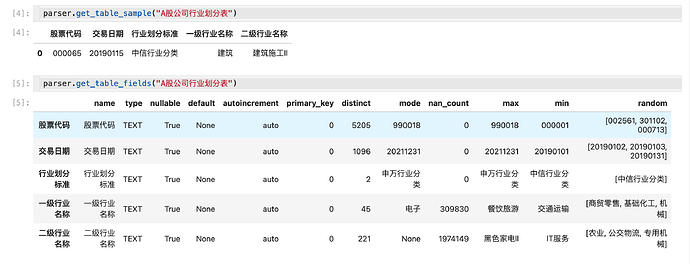  




In [ ]:
'''数据库解析'''
from typing import Union
import traceback
from sqlalchemy import create_engine, inspect, func, select, Table, MetaData
import pandas as pd

class DBParser:
    '''DBParser'''
    def __init__(self, db_url:str) -> None:
        '''初始化
        db_url: 数据库链接地址
        '''

        # 判断数据库类型
        if 'sqlite' in db_url:
            self.db_type = 'sqlite'
        elif 'mysql' in db_url:
            self.db_type = 'mysql'

        # 链接数据库
        self.engine = create_engine(db_url, echo=False)
        self.conn = self.engine.connect()
        self.db_url = db_url

        # 查看表明
        self.inspector = inspect(self.engine)
        self.table_names = self.inspector.get_table_names()

        self._table_fields = {} # 数据表字段
        self.foreign_keys = [] # 数据库外键
        self._table_sample = {} # 数据表样例

        # 依次对每张表的字段进行统计
        for table_name in self.table_names:
            print("Table ->", table_name)
            self._table_fields[table_name] = {}

            # 累计外键
            self.foreign_keys += [
                {
                    'constrained_table': table_name,
                    'constrained_columns': x['constrained_columns'],
                    'referred_table': x['referred_table'],
                    'referred_columns': x['referred_columns'],
                } for x in self.inspector.get_foreign_keys(table_name)
            ]

            # 获取当前表的字段信息
            table_instance = Table(table_name, MetaData(), autoload_with=self.engine)
            table_columns = self.inspector.get_columns(table_name)
            self._table_fields[table_name] = {x['name']:x for x in table_columns}

            # 对当前字段进行统计
            for column_meta in table_columns:
                # 获取当前字段
                column_instance = getattr(table_instance.columns, column_meta['name'])

                # 统计unique
                query = select([func.count(func.distinct(column_instance))])
                distinct_count = self.engine.execute(query).scalar()
                self._table_fields[table_name][column_meta['name']]['distinct'] = distinct_count

                # 统计most frequency value
                field_type = self._table_fields[table_name][column_meta['name']]['type']
                field_type = str(field_type)
                if 'text' in field_type.lower() or 'char' in field_type.lower():
                    query = (
                        select([column_instance, func.count().label('count')])
                        .group_by(column_instance)
                        .order_by(func.count().desc())
                        .limit(1)
                    )
                    top1_value = self.conn.execute(query).fetchone()[0]
                    self._table_fields[table_name][column_meta['name']]['mode'] = top1_value

                # 统计missing个数
                query = select(func.count()).filter(column_instance == None)
                nan_count = self.conn.execute(query).fetchone()[0]
                self._table_fields[table_name][column_meta['name']]['nan_count'] = nan_count

                # 统计max
                query = select(func.max(column_instance))
                max_value = self.conn.execute(query).fetchone()[0]
                self._table_fields[table_name][column_meta['name']]['max'] = max_value

                # 统计min
                query = select(func.min(column_instance))
                min_value = self.conn.execute(query).fetchone()[0]
                self._table_fields[table_name][column_meta['name']]['min'] = min_value

                # 任意取值
                query = select(column_instance).limit(10)
                random_value = self.conn.execute(query).all()
                random_value = [x[0] for x in random_value]
                random_value = [str(x) for x in random_value if x is not None]
                random_value = list(set(random_value))
                self._table_fields[table_name][column_meta['name']]['random'] = random_value[:3]

            # 获取表样例（第一行）
            query = select([table_instance])
            self._table_sample[table_name] = pd.DataFrame([self.conn.execute(query).fetchone()])
            self._table_sample[table_name].columns = [x['name'] for x in table_columns]


    def get_table_fields(self, table_name) -> pd.DataFrame:
        '''获取表字段信息'''
        return pd.DataFrame.from_dict(self._table_fields[table_name]).T

    def get_data_relations(self) -> pd.DataFrame:
        '''获取数据库链接信息（主键和外键）'''
        return pd.DataFrame(self.foreign_keys)

    def get_table_sample(self, table_name) -> pd.DataFrame:
        '''获取数据表样例'''
        return self._table_sample[table_name]

    def check_sql(self, sql) -> Union[bool, str]:
        '''检查sql是否合理

        参数
            sql: 待执行句子

        返回: 是否可以运行 报错信息
        '''
        try:
            self.engine.execute(sql)
            return True, 'ok'
        except:
            err_msg = traceback.format_exc()
            return False, err_msg

    def execute_sql(self, sql) -> bool:
        '''运行SQL'''
        result = self.engine.execute(sql)
        return list(result)

parser = DBParser('sqlite:///./bs_challenge_financial_14b_dataset/dataset/博金杯比赛数据.db')
parser.get_table_fields("A股公司行业划分表") 


In [ ]:
def sql_agent(table_name, table_info, question):
    prompt_template = '''你是一个sql专家，基于已有的表格信息，请将下面的问题转换为sql查询语句。直接输出sql，不要输出其他内容。
表名称：{0}

表格信息：
{1}

待查询问题：{2}
'''.format(table_name, table_info, question)

    return ask_glm(prompt_template)['choices'][0]['message']['content']

sql_agent(
    "A股公司行业划分表",
    parser.get_table_fields("A股公s司行业划分表").to_markdown(),
    '查询下总共有多少个股票'
)